## Spam Detetction

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import accuracy_score,fbeta_score,classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
## Importing the data

new_dataset = pd.read_csv('C:/Users/dell/Downloads/spam.csv',sep = '\t',names = ["label","message"])

new_dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
new_dataset['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Clearly a disbalance dataset. We need to balance the dataset using the concept of undersampling the majority data.

In [6]:
new_dataset['length']  = new_dataset['message'].str.len()

In [7]:
new_dataset.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
new_dataset.isnull().sum()

label      0
message    0
length     0
dtype: int64

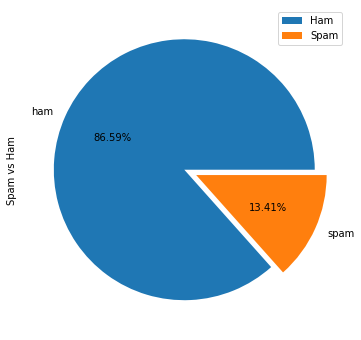

In [9]:
new_dataset['label'].value_counts().plot(kind = 'pie',explode = [0,0.1],figsize = (6,6),autopct = '%1.2f%%')

plt.ylabel("Spam vs Ham")
plt.legend(["Ham","Spam"])
plt.show()

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

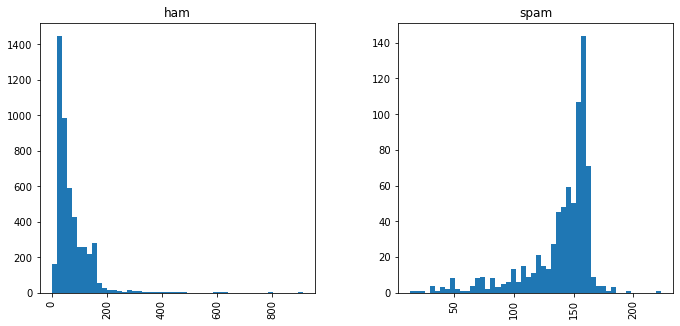

In [10]:
new_dataset.hist(column = 'length', by = 'label',bins = 50,figsize = (11,5))

We can conclude that the more the message i.e. more than the length 150 the more it is likely to be spam.

## Text Transformation

In [11]:
import string

def cleanText(message):

  message = re.sub('[^a-zA-Z]',' ',message)
  message = message.lower()
  message = message.split()
  words = [wnl.lemmatize(word) for word in message if word not in stop]
  return  " ".join(words)


new_dataset["message"] = new_dataset["message"].apply(cleanText)
new_dataset.head(n=10)

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think go usf life around though,61
5,spam,freemsg hey darling week word back like fun st...,147
6,ham,even brother like speak treat like aid patent,77
7,ham,per request melle melle oru minnaminunginte nu...,160
8,spam,winner valued network customer selected receiv...,157
9,spam,mobile month u r entitled update latest colour...,154


In [12]:
## Creating wordcloud

spam_messages = new_dataset[new_dataset['label'] == 'spam']['message']
ham_messages = new_dataset[new_dataset['label'] == 'ham']['message']

In [13]:
spam_words = []
ham_words=[]

def extractSpamWords(spamMessages):
  global spam_words
  words = [word for word in word_tokenize(spamMessages)]
  spam_words = spam_words + words


def extractHamWords(hamMessages):
  global ham_words
  words = [word for word in word_tokenize(hamMessages)]
  ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

In [14]:
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobile',
 'month',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chance',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'p',
 'day',
 'day',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'www',
 'dbuk',
 'net',
 'lccltd',
 'pobox',
 'ldnw',
 'rw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'cl

In [17]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 'copy',
 'friend',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make',
 'v',
 

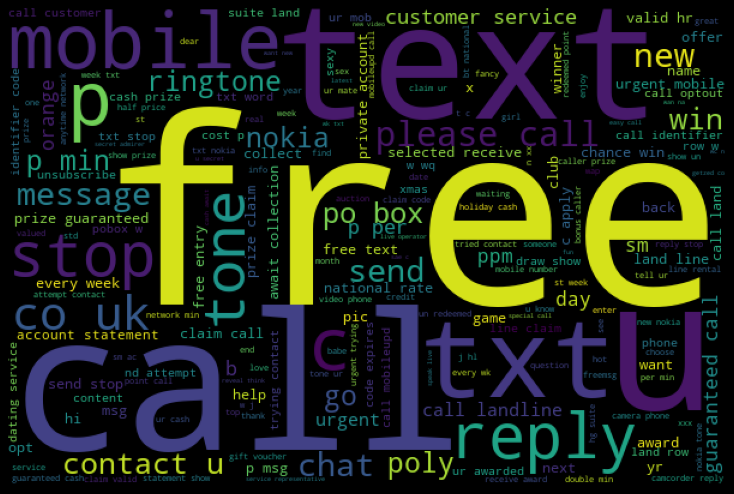

In [16]:
spam_wordcloud = WordCloud(width = 600,height =400).generate(" ".join(spam_words))
plt.figure(figsize = (10,8),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

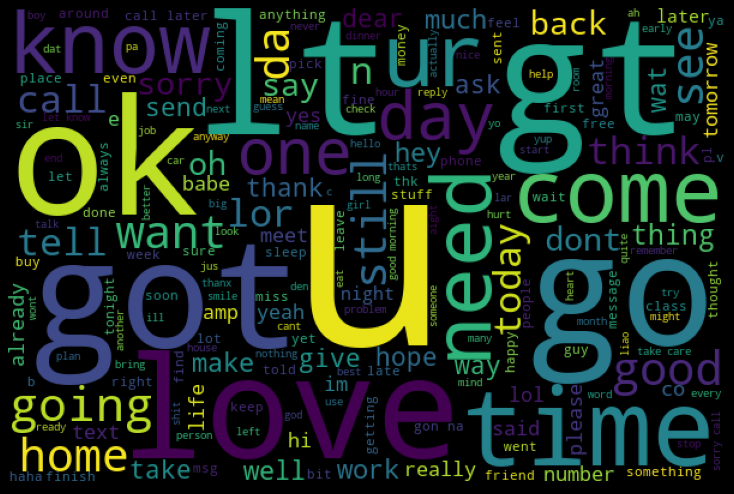

In [17]:
ham_wordcloud = WordCloud(width = 600,height =400).generate(" ".join(ham_words))
plt.figure(figsize = (10,8),facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [18]:
## Now we will vectorize our message using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(new_dataset['message'])
print(X.shape)

(5572, 7098)


In [20]:
cv = CountVectorizer()

X = cv.fit(new_dataset['message'])
X.vocabulary_
X.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit'

In [21]:
X = cv.fit_transform(new_dataset['message']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
df = pd.DataFrame(X,columns = cv.get_feature_names())
df

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = new_dataset['label']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(df,y,test_size = 0.20,random_state = 0)


# Training model using Naive bayes classisifier

from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

In [35]:
X_train.shape

(4457, 7098)

In [36]:
X_test.shape

(1115, 7098)

In [25]:
print(accuracy_score(y_test,y_pred))

0.9766816143497757


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       955
        spam       0.89      0.96      0.92       160

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
saved_model = pickle.dumps(spam_detect_model)

In [28]:
modelfrom_pickle = pickle.loads(saved_model)

In [29]:
y_pred = modelfrom_pickle.predict(X_test)

In [30]:
print(accuracy_score(y_test,y_pred))

0.9766816143497757


In [31]:
import joblib

In [32]:
joblib.dump(spam_detect_model,'pickle.pkl')

['pickle.pkl']

In [33]:
joblib.dump(cv,'transform.pkl')

['transform.pkl']